In [1]:
# Compare Algorithms
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# load dataset
df=pd.read_excel('pv_smote.xlsx')
df.head()

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,one,r_new,cluster
0,1,0.454303,10
1,1,0.455303,10
2,1,0.456303,10
3,1,0.457303,10
4,1,0.458303,10


In [2]:
# before SMOTE target distribution

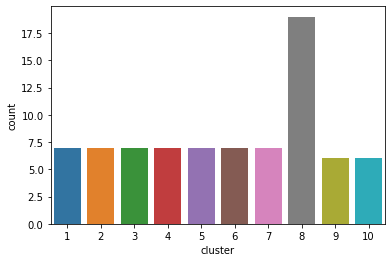

In [3]:
sns.countplot(x='cluster',data=df)

In [13]:
array = df.values
irr=df.drop(columns=['cluster'])
tar=df['cluster']
X=array[:,:-1]
y=array[:,-1]

In [14]:
y

array([10., 10., 10., 10., 10., 10.,  9.,  9.,  9.,  9.,  9.,  9.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [15]:

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 5

#X=df['r_new']
#y=df['cluster']

sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)


df_smote = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df_smote.columns = ['feature_1','r_new', 'cluster']
df_smote.to_csv('smote_pv_final.csv', index=False, encoding='utf-8')

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: Futur

In [16]:
df_smote=pd.read_csv('smote_pv_final.csv')

In [17]:
df_smote.drop(columns=['feature_1'],inplace=True)

In [18]:
# after smote

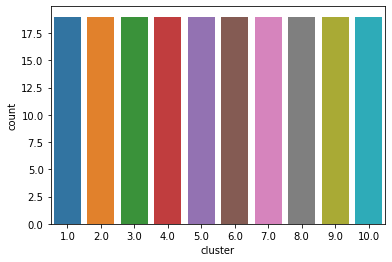

In [19]:
sns.countplot(x='cluster',data=df_smote)

In [58]:
array = df_smote.values
irr=df_smote['r_new']
tar=df_smote['cluster']
x=array[:,:-1]
y=array[:,1]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [61]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_pred=rf.predict(x_test)

In [74]:
y_pred

array([ 3., 10.,  5.,  3.,  9.,  1.,  5.,  5.,  7.,  4.,  7.,  8.,  2.,
        3.,  1.,  7.,  1.,  3.,  9.,  8.,  5.,  1.,  2.,  5.,  8., 10.,
        4.,  3.,  1.,  7.,  7.,  8.,  9.,  4.,  3.,  9.,  8.,  6.])

In [75]:
confusion_matrix(y_test,y_pred)

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64)

In [72]:
df_smote.nunique()

r_new      190
cluster     10
dtype: int64